In [3]:
import glob
from platform import python_version
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [4]:
df = pd.read_csv('users_data.csv')

### UpSampling the data

In [11]:
def convert_time(df):
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.date
    return df

df = convert_time(df)
df

,Unnamed: 0,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,...,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,mood_shift_b_2d,mood__shift_b_1d
0,0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,1968,AS14.33,2014-05-27,0.012704,8.545776,59.382943,62.347000,NaN,NaN,NaN,...,18.724333,NaN,1.0,-0.600000,0.4,6.2,113.607750,1.0,7.0,8.2
1969,1969,AS14.33,2014-05-28,0.103301,9.590398,37.238750,43.907571,NaN,NaN,44.738625,...,5.111000,NaN,1.0,0.000000,1.2,8.2,113.657683,1.0,6.8,7.0
1970,1970,AS14.33,2014-05-29,0.169354,6.452161,54.388125,68.369000,NaN,NaN,NaN,...,1.599500,NaN,1.0,-1.333333,1.0,7.0,118.978033,1.0,7.0,6.8
1971,1971,AS14.33,2014-05-30,0.192901,14.776845,46.412278,37.174286,NaN,NaN,NaN,...,15.521667,NaN,1.0,-0.800000,-0.4,6.8,86.342245,NaN,NaN,7.0


## mood per user 


[Text(0, 0, 'AS14.01'),
 Text(1, 0, 'AS14.02'),
 Text(2, 0, 'AS14.03'),
 Text(3, 0, 'AS14.05'),
 Text(4, 0, 'AS14.06'),
 Text(5, 0, 'AS14.07'),
 Text(6, 0, 'AS14.08'),
 Text(7, 0, 'AS14.09'),
 Text(8, 0, 'AS14.12'),
 Text(9, 0, 'AS14.13'),
 Text(10, 0, 'AS14.14'),
 Text(11, 0, 'AS14.15'),
 Text(12, 0, 'AS14.16'),
 Text(13, 0, 'AS14.17'),
 Text(14, 0, 'AS14.19'),
 Text(15, 0, 'AS14.20'),
 Text(16, 0, 'AS14.23'),
 Text(17, 0, 'AS14.24'),
 Text(18, 0, 'AS14.25'),
 Text(19, 0, 'AS14.26'),
 Text(20, 0, 'AS14.27'),
 Text(21, 0, 'AS14.28'),
 Text(22, 0, 'AS14.29'),
 Text(23, 0, 'AS14.30'),
 Text(24, 0, 'AS14.31'),
 Text(25, 0, 'AS14.32'),
 Text(26, 0, 'AS14.33')]

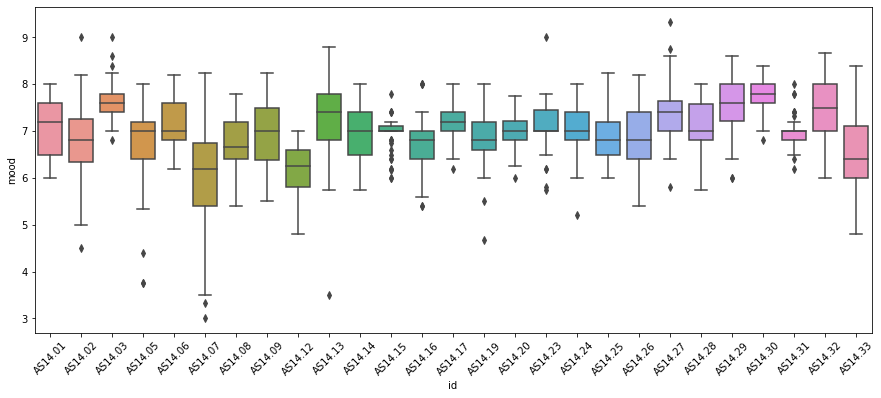

In [12]:
data = pd.concat([df['id'], df['mood']], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x='id', y="mood", data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)


## Correlation Matrix

In [135]:
# Feature engineering for lagging

def lag(df,columns):  
    for column in columns:
        if column != 'mood':
                df[f'{column}__shift_b_{1}d'] = df[f'{column}'].shift(1)
                df[f'{column}__shift_b_{2}d'] = df[f'{column}'].shift(2)
                df[f'{column}__shift_b_{3}d'] = df[f'{column}'].shift(3)
                df[f'{column}__shift_b_{4}d'] = df[f'{column}'].shift(4)
                df[f'{column}__shift_b_{5}d'] = df[f'{column}'].shift(5)
    return df

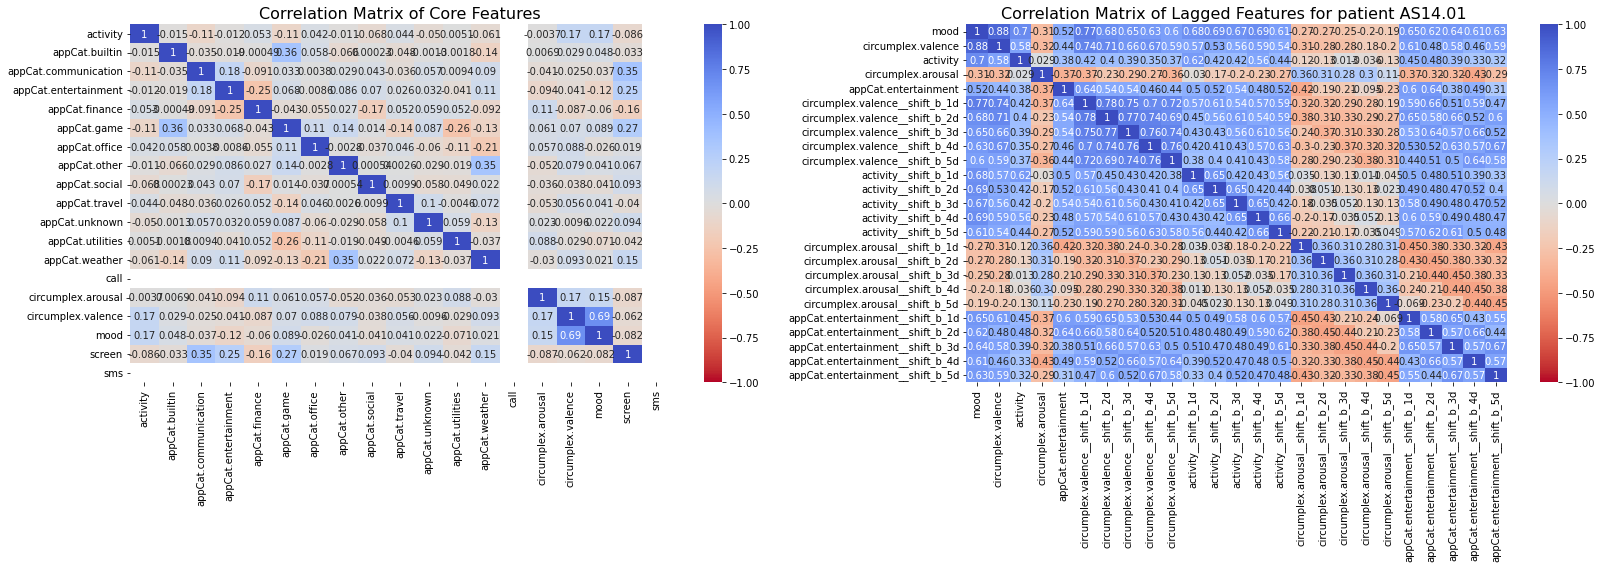

In [137]:

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(23, 8))


core_columns = ['time','activity','appCat.builtin',
       'appCat.communication', 'appCat.entertainment', 'appCat.finance',
       'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social',
       'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather',
       'call', 'circumplex.arousal', 'circumplex.valence', 'mood', 'screen',
       'sms',]


corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
# ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)
ax[0].set_title('Correlation Matrix of Core Features for all patient', fontsize=16)



# selected_cols = ['mood','mood_shift_b_2d', 'mood__shift_b_1d']


# acquire  top 5 realted attributes list  :['mood','circumplex.valence','activity','circumplex.arousal','appCat.entertainment','appCat.game']]
atrributes_list = list(corrmat['mood'].abs().sort_values(ascending=False)[0:5].index)
df_1 = df[df.id == 'AS14.01'].set_index('time')
atrributes_list
df_1 = df_1[atrributes_list]

df_1 = missing_value(df_1)


df_1_lag = lag(df_1,columns=atrributes_list)


corrmat = df_1_lag.corr()
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features for patient AS14.01 ', fontsize=16)





plt.tight_layout()
plt.show()


In [ ]:

def missing_value(df,option=0):
    """  Option 1: Fill NaN with Mean Value
    Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

    Option 2: Fill NaN with Last Value with .ffill()
    Filling NaNs with the last value could be bit better.

    Option 2: Fill NaN with Linearly Interpolated Value with .interpolate()
    Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value
    """
    if option==0:
        return df.fillna(0)
    elif option==1:
        return df.fillna(df.mean())
    elif option==2:
        return df.ffill()

In [129]:
def lag(df,columns):  
    for column in columns:
        if column != 'mood':
                df[f'{column}__shift_b_{1}d'] = df[f'{column}'].shift(1)
                df[f'{column}__shift_b_{2}d'] = df[f'{column}'].shift(2)
                df[f'{column}__shift_b_{3}d'] = df[f'{column}'].shift(3)
                df[f'{column}__shift_b_{4}d'] = df[f'{column}'].shift(4)
                df[f'{column}__shift_b_{5}d'] = df[f'{column}'].shift(5)
    return df


# acquire  top 5 realted attributes list  :['mood','circumplex.valence','activity','circumplex.arousal','appCat.entertainment','appCat.game']]
atrributes_list = list(corrmat['mood'].abs().sort_values(ascending=False)[0:5].index)
df_1 = df[df.id == 'AS14.01'].set_index('time')
atrributes_list
df_1 = df_1[atrributes_list]

df_1 = missing_value(df_1)


df_1_lag = lag(df_1,columns=atrributes_list)



,mood,circumplex.valence,activity,circumplex.arousal,appCat.entertainment,circumplex.valence__shift_b_1d,circumplex.valence__shift_b_2d,circumplex.valence__shift_b_3d,circumplex.valence__shift_b_4d,circumplex.valence__shift_b_5d,...,circumplex.arousal__shift_b_1d,circumplex.arousal__shift_b_2d,circumplex.arousal__shift_b_3d,circumplex.arousal__shift_b_4d,circumplex.arousal__shift_b_5d,appCat.entertainment__shift_b_1d,appCat.entertainment__shift_b_2d,appCat.entertainment__shift_b_3d,appCat.entertainment__shift_b_4d,appCat.entertainment__shift_b_5d
time,,,,,,,,,,,,,,,,,,,,,
2014-05-01,8.0,1.0,0.037065,-0.4,58.858250,0.75,1.00,0.80,1.00,1.00,...,-0.4,-0.25,-0.80,0.00,-0.20,33.657467,65.105542,110.602714,137.292818,125.556000
2014-05-02,7.6,1.0,0.077341,-0.2,58.814667,1.00,0.75,1.00,0.80,1.00,...,-0.4,-0.40,-0.25,-0.80,0.00,58.858250,33.657467,65.105542,110.602714,137.292818
2014-05-03,8.0,1.0,0.071741,-0.2,125.543182,1.00,1.00,0.75,1.00,0.80,...,-0.2,-0.40,-0.40,-0.25,-0.80,58.814667,58.858250,33.657467,65.105542,110.602714
2014-05-04,8.0,1.0,0.136192,-0.5,154.734333,1.00,1.00,1.00,0.75,1.00,...,-0.2,-0.20,-0.40,-0.40,-0.25,125.543182,58.814667,58.858250,33.657467,65.105542
2014-05-05,0.0,0.0,0.007843,0.0,318.514000,1.00,1.00,1.00,1.00,0.75,...,-0.5,-0.20,-0.20,-0.40,-0.40,154.734333,125.543182,58.814667,58.858250,33.657467


In [131]:
df_1_lag[['activity','activity__shift_b_1d',
 'activity__shift_b_2d',
 'activity__shift_b_3d',
 'activity__shift_b_4d',
 'activity__shift_b_5d']]


,activity,activity__shift_b_1d,activity__shift_b_2d,activity__shift_b_3d,activity__shift_b_4d,activity__shift_b_5d
time,,,,,,
2014-02-17,0.000000,NaN,NaN,NaN,NaN,NaN
2014-02-18,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-02-19,0.000000,0.000000,0.000000,NaN,NaN,NaN
2014-02-20,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2014-02-21,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...
2014-05-01,0.037065,0.151051,0.102758,0.019675,0.030479,0.214249
2014-05-02,0.077341,0.037065,0.151051,0.102758,0.019675,0.030479
2014-05-03,0.071741,0.077341,0.037065,0.151051,0.102758,0.019675


## Mood time series per user

In [27]:
df[df.id == 'AS14.01']

,Unnamed: 0,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,...,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,mood_shift_b_2d,mood__shift_b_1d
0,0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,1968,AS14.33,2014-05-27,0.012704,8.545776,59.382943,62.347000,NaN,NaN,NaN,...,18.724333,NaN,1.0,-0.600000,0.4,6.2,113.607750,1.0,7.0,8.2
1969,1969,AS14.33,2014-05-28,0.103301,9.590398,37.238750,43.907571,NaN,NaN,44.738625,...,5.111000,NaN,1.0,0.000000,1.2,8.2,113.657683,1.0,6.8,7.0
1970,1970,AS14.33,2014-05-29,0.169354,6.452161,54.388125,68.369000,NaN,NaN,NaN,...,1.599500,NaN,1.0,-1.333333,1.0,7.0,118.978033,1.0,7.0,6.8
1971,1971,AS14.33,2014-05-30,0.192901,14.776845,46.412278,37.174286,NaN,NaN,NaN,...,15.521667,NaN,1.0,-0.800000,-0.4,6.8,86.342245,NaN,NaN,7.0


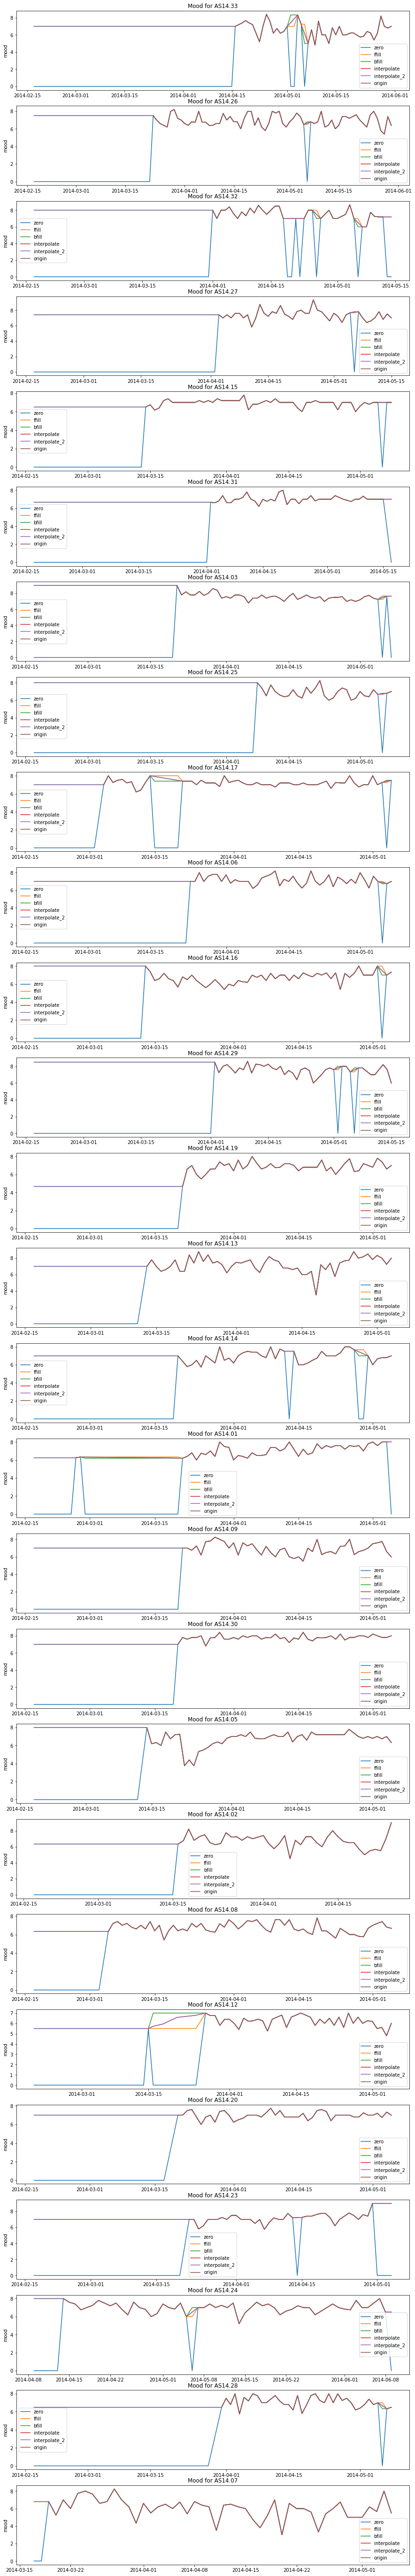

In [15]:
user_list = df.id.value_counts().keys()
user_df = df.copy()
old_mood = df['mood'].copy()
f, ax = plt.subplots(nrows=len(user_list), ncols=1, figsize=(15,100))
for i,user in enumerate(user_list) :
    user_df = df[df['id']==user]
    # upsample = user_df.resample('D',on='t
    # ime').mean().reset_index(drop=False)
    # user_df = upsample.copy()
    # sns.lineplot(x=user_df['time'], y=old_mood, ax=ax[i], color='darkorange', label='original', estimator=None)
    # sns.lineplot(x=user_df['time'], y=user_df['mood'].fillna(0), color='dodgerblue',ax=ax[i],label='modify')、
    ax[i].plot(user_df['time'], user_df['mood'].fillna(0),label='zero')
    ax[i].plot(user_df['time'], user_df['mood'].fillna(method='ffill'),label='ffill')
    ax[i].plot(user_df['time'], user_df['mood'].fillna(method='bfill'), label='bfill')
    ax[i].plot(user_df['time'], user_df['mood'].fillna(user_df['mood'].interpolate()),label='interpolate')
    ax[i].plot(user_df['time'], user_df['mood'].interpolate(limit_direction="both"),label='interpolate_2')
    ax[i].plot(user_df['time'], user_df['mood'], label='origin')

    ax[i].set_title('Mood for '+user)
    ax[i].set_ylabel('mood')
    ax[i].legend()
    
